# Ex 6.4 Cleaning Non-Numeric Junk

- [**Part 1: Employees**](#Part-1:-Employees)  
- [**Part 2: Shoes**](#Part-2:-Shoes)
- [**Part 3: NBA (Recap)**](#Part-3:--NBA-(Recap))  
  - Question 3.1: What is the Average Weight by Position?  
  - Question 3.2 What are the Top 5 Colleges for Sending Players to the NBA?


In [1]:
import pandas as pd 
import plotly.express as px

# Part 1: Employees 

In [15]:
# Hardcode a dataframe 
df_employees = pd.DataFrame(
    [
    [1699,'  Robinett, David  ','  david22@adventure-works.com  ', '(827) 525-0100', '06-05-2010', '$80,950'], 
    [1700,'  Robinson, Rebecca  ','  rebecca5 @adventure-works.com  ', '(829) 525-0101', '05-01-2015', '$70,950'],
    [1701,'     Robinson, Dorothy    ','  dorothy3@adventure-works.com    ', '(828) 555-0102', '03-01-2017', '$50,00'],
    ], 
    columns=['BusinessEntityID', 'EmployeeName','EmailAddress', 'PhoneNumber', 'StartDate', 'CurrentSalary'])
  
df_employees.dtypes
#Show the before
#df_employees['EmployeeName']

BusinessEntityID     int64
EmployeeName        object
EmailAddress        object
PhoneNumber         object
StartDate           object
CurrentSalary       object
dtype: object

In [16]:
#df_employees['StartDate'] = pd.to_numeric(df_employees['StartDate']).astype(datetime)
#df_employees.dtypes

In [17]:
df_employees.head(2)

,BusinessEntityID,EmployeeName,EmailAddress,PhoneNumber,StartDate,CurrentSalary
0,1699,"Robinett, David",david22@adventure-works.com,(827) 525-0100,06-05-2010,"$80,950"
1,1700,"Robinson, Rebecca",rebecca5 @adventure-works.com,(829) 525-0101,05-01-2015,"$70,950"


### Strip leading and trailing spaces

In [18]:
df_employees['EmployeeName'] = df_employees['EmployeeName'].str.strip()

In [19]:
#After
df_employees['EmployeeName']

0      Robinett, David
1    Robinson, Rebecca
2    Robinson, Dorothy
Name: EmployeeName, dtype: object

### Get rid of non-numeric junk in CurrentSalary 

In [22]:
df_employees['CurrentSalary'] = df_employees['CurrentSalary'].str.replace('$', '')
df_employees['CurrentSalary'] = df_employees['CurrentSalary'].str.replace(',', '')
df_employees.head(2)

,BusinessEntityID,EmployeeName,EmailAddress,PhoneNumber,StartDate,CurrentSalary
0,1699,"Robinett, David",david22@adventure-works.com,(827) 525-0100,06-05-2010,80950
1,1700,"Robinson, Rebecca",rebecca5 @adventure-works.com,(829) 525-0101,05-01-2015,70950


### Change Data Types

In [33]:
df_employees['CurrentSalary'] = pd.to_numeric(df_employees['CurrentSalary']).astype(float)
df_employees['StartDate'] = pd.to_datetime(df_employees['StartDate'])
df_employees.dtypes

BusinessEntityID             int64
EmployeeName                object
EmailAddress                object
PhoneNumber                 object
StartDate           datetime64[ns]
CurrentSalary              float64
dtype: object

In [34]:
df_employees.head(2)

,BusinessEntityID,EmployeeName,EmailAddress,PhoneNumber,StartDate,CurrentSalary
0,1699,"Robinett, David",david22@adventure-works.com,(827) 525-0100,2010-06-05,80950.0
1,1700,"Robinson, Rebecca",rebecca5 @adventure-works.com,(829) 525-0101,2015-05-01,70950.0


# Part 2: Shoes  

In [37]:
# Hardcode a dataframe
df_shoes = pd.DataFrame(
    [
    [1,'2018-05-02','Pumps','7 (EU)','Gold','$25,100','CA-121'],
    [2,'2018-05-03','Pumps','4 (EU)','Gold','$35,500','CA-235'],
    [3,'2018-06-04','Loafer','6 (EU)','Gold','$50,000','NY-12'],
    ], 
    columns=['OrderID','Order Date','Shoe_Type','Size','Colour','Sales','StoreID'])

df_shoes
df_shoes.dtypes

OrderID        int64
Order Date    object
Shoe_Type     object
Size          object
Colour        object
Sales         object
StoreID       object
dtype: object

### Get rid of non-numeric junk in Sales field

In [38]:
df_shoes['Size'] = df_shoes['Size'].str.replace('(', '')
df_shoes['Size'] = df_shoes['Size'].str.replace('EU', '')
df_shoes['Size'] = df_shoes['Size'].str.replace(')', '')
df_shoes.head(2)

,OrderID,Order Date,Shoe_Type,Size,Colour,Sales,StoreID
0,1,2018-05-02,Pumps,7,Gold,"$25,100",CA-121
1,2,2018-05-03,Pumps,4,Gold,"$35,500",CA-235


### Get rid of non-numeric junk in Size field

In [39]:
df_shoes['Sales'] = df_shoes['Sales'].str.replace('$', '')
df_shoes['Sales'] = df_shoes['Sales'].str.replace(',', '')
df_shoes.head(2)

,OrderID,Order Date,Shoe_Type,Size,Colour,Sales,StoreID
0,1,2018-05-02,Pumps,7,Gold,25100,CA-121
1,2,2018-05-03,Pumps,4,Gold,35500,CA-235


### Change Data Types

In [40]:
df_shoes.dtypes

OrderID        int64
Order Date    object
Shoe_Type     object
Size          object
Colour        object
Sales         object
StoreID       object
dtype: object

In [42]:
df_shoes['Size'] = pd.to_numeric(df_shoes['Size']).astype(int)
df_shoes['Sales'] = pd.to_numeric(df_shoes['Sales']).astype(float)
df_shoes['Order Date'] = pd.to_datetime(df_shoes['Order Date'])
df_shoes.dtypes

OrderID                int64
Order Date    datetime64[ns]
Shoe_Type             object
Size                   int32
Colour                object
Sales                float64
StoreID               object
dtype: object

### Rename columns  
- Changed these columns to:  Order_ID, Order_Date, Color, Store_ID  
- Leave the other columns names as they are

In [46]:
cols_to_rename = {
                  'OrderID':'Order_ID',
                  'Order Date':'Order_Date',
                  'Colour':'Color',
                  'StoreID':'Store_ID'
                  }

# Rename the columns inplace
df_shoes.rename(columns=cols_to_rename, inplace=True)
df_shoes.head(2)

,Order_ID,Order_Date,Shoe_Type,Size,Color,Sales,Store_ID
0,1,2018-05-02,Pumps,7,Gold,25100.0,CA-121
1,2,2018-05-03,Pumps,4,Gold,35500.0,CA-235


In [44]:
df_shoes.dtypes

Order_ID               int64
Order_Date    datetime64[ns]
Shoe_Type             object
Size                   int32
Color                 object
Sales                float64
Store_ID              object
dtype: object

# Part 3:  NBA (Recap)    

- Data source:  **nba.csv**  

## Question 3.1: What is the Average Weight by Position?

In [47]:
df_nba = pd.read_csv('Data/nba.csv')

print(df_nba.shape)
df_nba.head()

(458, 9)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [50]:
#data types 'Before'
df_nba.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [ ]:
#Convert MSRP, Invoice, MPG_City, MPG_Highway to floats
#df_nba['Sales'] = pd.to_numeric(df_nba['Sales']).astype(float)

In [51]:
# data types 'After'
#df_nba.dtypes

In [52]:
df_nba = df_nba.groupby("Position")['Weight'].mean()

df_nba

Position
C     254.205128
PF    240.430000
PG    189.478261
SF    221.776471
SG    206.686275
Name: Weight, dtype: float64

In [53]:
df_nba = df_nba.to_frame()

df_nba

,Weight
Position,
C,254.205128
PF,240.430000
PG,189.478261
SF,221.776471
SG,206.686275


In [54]:
df_nba.reset_index(inplace=True)
df_nba.head()

,Position,Weight
0,C,254.205128
1,PF,240.430000
2,PG,189.478261
3,SF,221.776471
4,SG,206.686275


In [55]:
df_nba.sort_values(by='Weight', ascending=False, inplace=True)

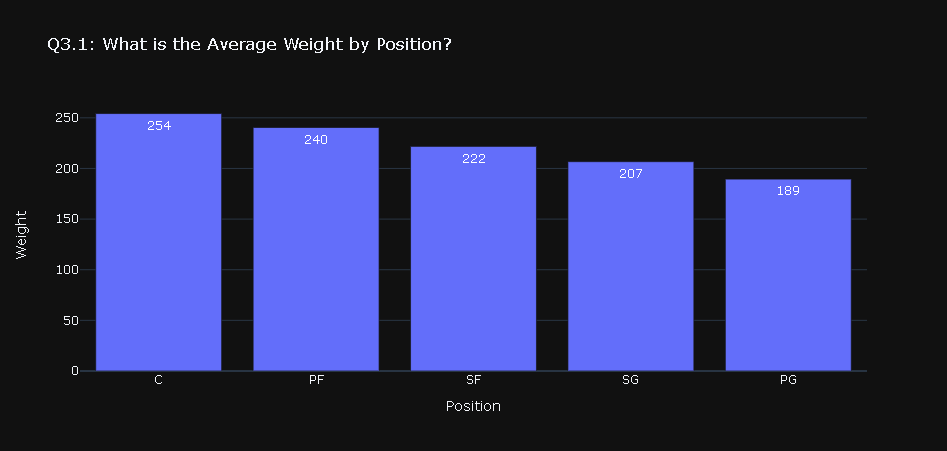

In [67]:
fig = px.bar(df_nba,
            x='Position',
            y='Weight',
            template='plotly_dark',
            title=" Q3.1: What is the Average Weight by Position?",
            text='Weight')

fig.update_traces(textposition='auto',
                 texttemplate = '%{text:.3s}')

fig.show()

## Question 3.2 What are the Top 5 Colleges for Sending Players to the NBA?

In [69]:
df_players = pd.read_csv('Data/nba.csv')

print(df_players.shape)
df_players.head()

(458, 9)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [81]:
df_players_count = df_players.groupby('College').count()

print(df_players_count.shape)
df_players_count.head()

(118, 8)


,Name,Team,Number,Position,Age,Height,Weight,Salary
College,,,,,,,,
Alabama,3,3,3,3,3,3,3,3
Arizona,13,13,13,13,13,13,13,13
Arizona State,2,2,2,2,2,2,2,2
Arkansas,3,3,3,3,3,3,3,3
Baylor,1,1,1,1,1,1,1,1


In [82]:
df_players_count.reset_index(inplace=True)
print(df_players_count.shape)
df_players_count.head()

(118, 9)


,College,Name,Team,Number,Position,Age,Height,Weight,Salary
0,Alabama,3,3,3,3,3,3,3,3
1,Arizona,13,13,13,13,13,13,13,13
2,Arizona State,2,2,2,2,2,2,2,2
3,Arkansas,3,3,3,3,3,3,3,3
4,Baylor,1,1,1,1,1,1,1,1


In [86]:
df_players_count.sort_values(by='Name', ascending=False, inplace=True)
print(df_players_count.shape)
df_players_count

(118, 9)


,College,Name,Team,Number,Position,Age,Height,Weight,Salary
45,Kentucky,22,22,22,22,22,22,22,22
26,Duke,20,20,20,20,20,20,20,18
43,Kansas,18,18,18,18,18,18,18,18
66,North Carolina,16,16,16,16,16,16,16,16
96,UCLA,15,15,15,15,15,15,15,14
...,...,...,...,...,...,...,...,...,...
17,Cleveland State,1,1,1,1,1,1,1,1
5,Belmont,1,1,1,1,1,1,1,1
9,Bowling Green,1,1,1,1,1,1,1,1
32,Georgia,1,1,1,1,1,1,1,1


In [87]:
columns_to_keep = ['College', 'Name']

df_keep = df_players_count[columns_to_keep]

print(df_keep.shape)
df_keep.head()

(118, 2)


,College,Name
45,Kentucky,22
26,Duke,20
43,Kansas,18
66,North Carolina,16
96,UCLA,15


In [88]:
cols_to_rename = {
                  'Name':'Number_of_Players',
                  'College':'College'
                  }

# Rename the columns inplace
df_keep.rename(columns=cols_to_rename, inplace=True)
print(df_keep.shape)
df_keep.head()

(118, 2)


C:\ProgramData\Anaconda3\envs\F20_Cis_340\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,College,Number_of_Players
45,Kentucky,22
26,Duke,20
43,Kansas,18
66,North Carolina,16
96,UCLA,15


In [92]:
df_top5 = df_keep.iloc[:5]
df_top5


,College,Number_of_Players
45,Kentucky,22
26,Duke,20
43,Kansas,18
66,North Carolina,16
96,UCLA,15


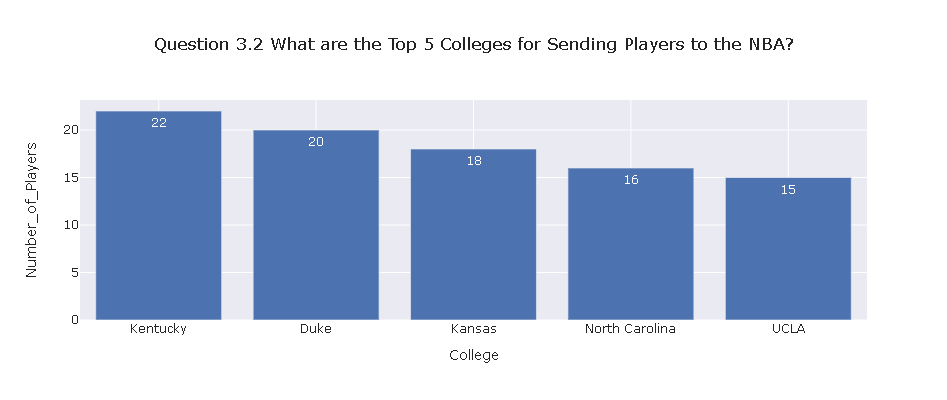

In [97]:
fig = px.bar(df_top5,
            x='College',
            y='Number_of_Players',
            width=900,
            height=400,
            template='seaborn',
            text= 'Number_of_Players',
            title='Question 3.2 What are the Top 5 Colleges for Sending Players to the NBA?')
fig.show()